In [45]:
from scipy import integrate
import numpy as np
Pw = 0.1 # W
duty_cycle = 200e-15*80e6
Pw_peak = 0.1/duty_cycle # W

w0_fix = 10e-6 #m
w0_tun = 5e-6 #m
def w(w0, z, z0=0, M2=1, Lambda=1045e-9):
    return w0*np.sqrt(1+(Lambda*(z-z0)*M2/np.pi/w0**2)**2)


def I(r,z,theta, z0=0, Pw=Pw, M2=1, w0=w0_fix, Lambda=1045e-9):
        return (2*Pw/np.pi/w(w0,z,z0=z0,M2=M2,Lambda=Lambda)**2*  \
                np.exp(-2*r**2/w(w0,z,z0=z0,M2=M2,Lambda=Lambda)**2))**2*r

M2_tun_ = [1,1.1,1.2,2]
M2_fix_ = [1,1.1,1.2,2]

w0_tun_ = [5e-6,6e-6,7e-6,8e-6]
for w0_tun in w0_tun_:
    for M2_fix in M2_fix_:
        
        for M2_tun in M2_tun_:
            f_fix = lambda theta,z,r: I(r,z,theta,z0=0, Pw=Pw, M2=M2_fix, w0=w0_fix, Lambda=1045e-9)

            res_fix = integrate.tplquad(f_fix,
                                        0, 10e-3,
                                        lambda r: -1e-3, lambda r: 1e-3,
                                        lambda r, z: 0, lambda r, z: 2*np.pi)
            f_tun = lambda theta,z,r: I(r,z,theta,z0=0, Pw=Pw, M2=M2_tun, w0=w0_tun, Lambda=1045e-9)

            res_tun = integrate.tplquad(f_tun,
                                        0, 5e-3,
                                        lambda r: -1e-3, lambda r: 1e-3,
                                        lambda r, z: 0, lambda r, z: 2*np.pi)

            print(M2_tun,M2_fix,w0_tun*1e6,res_fix,res_tun, res_tun[0]/res_fix[0],100/60)



1 1 5.0 (24473.8918199868, 2.6567586213350296) (28627.361610557884, 5.313519138842821) 1.169710229215736 1.6666666666666667
1.1 1 5.0 (24473.8918199868, 2.6567586213350296) (26143.1431490202, 3.0370063324953662) 1.0682053896990014 1.6666666666666667
1.2 1 5.0 (24473.8918199868, 2.6567586213350296) (24054.969645830504, 14.778885705003631) 0.9828828950770233 1.6666666666666667
2 1 5.0 (24473.8918199868, 2.6567586213350296) (14672.106618025125, 2.6567598078399897) 0.599500346162478 1.6666666666666667
1 1.1 5.0 (22688.308608886506, 1.5185023001176887) (28627.361610557884, 5.313519138842821) 1.2617671111607316 1.6666666666666667
1.1 1.1 5.0 (22688.308608886506, 1.5185023001176887) (26143.1431490202, 3.0370063324953662) 1.152273781165887 1.6666666666666667
1.2 1.1 5.0 (22688.308608886506, 1.5185023001176887) (24054.969645830504, 14.778885705003631) 1.060236356112007 1.6666666666666667
2 1.1 5.0 (22688.308608886506, 1.5185023001176887) (14672.106618025125, 2.6567598078399897) 0.64668137545865

In [48]:
Out

{1: (1.8750000000000002, 3.324644794257407e-14), 46: 78.0}

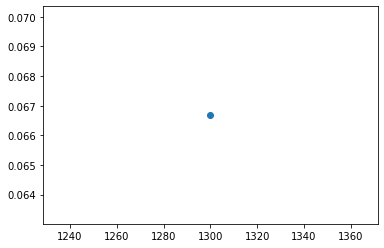

In [32]:
import exdir
from matplotlib import pyplot as plt
%matplotlib inline
store = exdir.File('ZnO90-200Eth_ex1045_1300-1045.exdir','r')
t = min(store)
data_ = store[t]['scan']
w = data_['time']!=0
data = data_[w]
plt.plot(data['LaserWavelength'],data['Powermeter']['Power'],'o-',label='Power')

plt.show()